# CNN:

<img src="Lecture_Image_Files/lec_16/Images/conv.gif" alt="python CNN" width=94% height=85% title="CNN Convolution"> 

A Convolutional Neural Network (CNN) is a type of deep learning model primarily used for image processing and analysis. 

# Deep Learning on large Images

<img src="Lecture_Image_Files/lec_16/Images/deep_large_img.jpg" alt="large img" width=94% height=85%> 

If we work with small 64 by 64 images, which have 3 color channels (red, green, and blue). This made for a total of 12,288 input features, which was manageable. But when dealing with larger images, like 1,000 by 1,000 pixels (1 megapixel), the input features become huge. For instance, a 1,000 by 1,000 image with 3 RGB channels results in 3 million input features.

Now, let's talk about neural networks. In a neural network, the first hidden layer often has some number of hidden units. Let's say there are 1,000 hidden units in this layer.

In the earlier large image example, this would mean the weight matrix (W1) connecting the input features to the hidden units would have dimensions of 1,000 by 3 million. This is a massive matrix with 3 billion parameters (values), which is really hard to manage because it requires a vast amount of data to train effectively, and it's computationally intensive.

To make things easier, especially for computer vision tasks, we need to use convolutional neural networks (CNNs). These networks are designed to work well with large images and reduce the number of parameters by using a clever technique called convolution, making it more practical to work with high-resolution images like 1,000 by 1,000 or even larger.

## What a CNN can see

<img src="Lecture_Image_Files/lec_16/Images/layer_detect.jpg" alt="large img" width=94% height=85%> 

<img src="Lecture_Image_Files/lec_16/Images/vertical_edge.gif" alt="large img" width=94% height=85%> 

In this section, we'll explore how convolution works, a crucial component of Convolutional Neural Networks (CNNs). In CNNs, early layers often detect edges in images. For instance, if you want to identify objects in a picture, you might start by detecting vertical and horizontal edges.

Let's consider an example: a grayscale 6x6 image. To find vertical edges, we use a 3x3 filter. The convolution operation combines the image and filter. We slide the filter across the image, element-wise multiplying and summing to get a 4x4 output.

To compute each element of the output, we place the filter on a 3x3 region of the input and perform element-wise multiplication and addition. This process repeats across the image, giving us the 4x4 output matrix.

In this example, we used a filter designed to detect vertical edges. It highlights areas in the image where there's a transition from light to dark or vice versa. This output acts as a "vertical edge detector."

In practice, CNNs use convolution as a fundamental operation to detect various features in images, starting with edges and progressing to more complex patterns.

### Vertical Edge Detector:

<img src="Lecture_Image_Files/lec_16/Images/vertical_edge.png" alt="large img" width=94% height=85%> 

Imagine a 6x6 picture split in half. The left side is bright with "10" values, and the right side is dark with "0" values. When we use a special 3x3 filter on this image, it looks for changes from bright to dark.

This filter detects a strong vertical line down the middle where the image transitions from bright to dark. When we apply this filter, we get a matrix that shows this vertical line. It's like the filter is highlighting the edge.

Keep in mind, in real applications with larger images, this edge detection works just as effectively, even if it might look thicker on a small image like our 6x6 example.

In simple terms, this process helps a computer find vertical edges in pictures. It's a fundamental part of building Convolutional Neural Networks, which are used for recognizing objects in images.


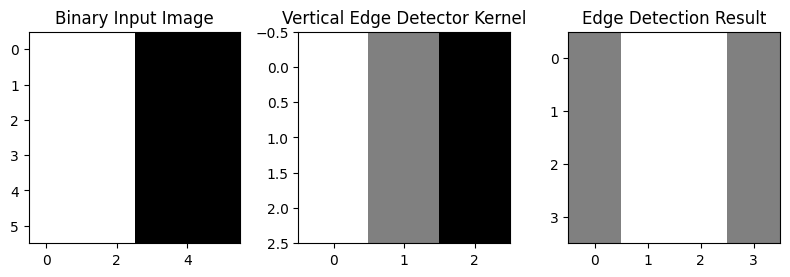

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Create a binary image with the left half as 10s and the right half as 0s with hardcoded values
input_tensor = torch.tensor([[10, 10, 10, 0, 0, 0],
                             [10, 10, 10, 0, 0, 0],
                             [10, 10, 10, 0, 0, 0],
                             [10, 10, 10, 0, 0, 0],
                             [10, 10, 10, 0, 0, 0],
                             [10, 10, 10, 0, 0, 0]], dtype=torch.float32).view(1, 1, 6, 6)  # (batch_size, channels, height, width)

# Define a vertical edge detector kernel
kernel = torch.tensor([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]], dtype=torch.float32).view(1, 1, 3, 3)  # (out_channels, in_channels, kernel_height, kernel_width)

# Perform convolution without padding
edge_detection_result = F.conv2d(input_tensor, kernel)

# Convert the tensors to NumPy arrays for visualization
input_image = input_tensor[0, 0].detach().numpy()
kernel_image = kernel[0, 0].detach().numpy()
edge_detection_image = edge_detection_result[0, 0].detach().numpy()

# Define a smaller figure size
fig, axs = plt.subplots(1, 3, figsize=(8, 3))  # Adjust the figsize here

axs[0].imshow(input_image, cmap='gray', vmin=0, vmax=10)
axs[0].set_title('Binary Input Image')

axs[1].imshow(kernel_image, cmap='gray')
axs[1].set_title('Vertical Edge Detector Kernel')

axs[2].imshow(edge_detection_image, cmap='gray', vmin=-10, vmax=10)
axs[2].set_title('Edge Detection Result')

# Add spacing between subplots
plt.tight_layout()

plt.show()


### More detector example

#### Sobel:
<img src="Lecture_Image_Files/lec_16/Images/sobel.png" alt="large img" width=60% height=60%> 

#### Comparison

<img src="Lecture_Image_Files/lec_16/Images/canny.jpg" alt="large img" width=60% height=60%> 


### After applying on Image


<img src="Lecture_Image_Files/lec_16/Images/edge_detector.png" alt="large img" width=80% height=80%> 

### How cnn solves the problem:

<img src="Lecture_Image_Files/lec_16/Images/weight_filter.jpg" alt="large img" width=80% height=80%>

With the emergence of deep learning, we've discovered that when we want to identify edges in a complex image, we might not need computer vision experts to manually select nine specific values. Instead, we can allow the neural network to learn these nine values as parameters through backpropagation. The objective is to optimize these nine parameters so that when we apply them as a 3x3 filter to a 6x6 image, it effectively detects edges in the image.

### Padding in Convolutional Operations

<img src="Lecture_Image_Files/lec_16/Images/zero_padding.gif" alt="large img" width=80% height=80%>



In order to build deep neural networks, it's important to understand the concept of **padding** when performing convolutional operations. Padding involves adding extra pixels around the edges of an image before convolution. This is crucial for two reasons:

1. **Preserving Image Size:** Without padding, convolution operations can cause the image to shrink, which can be problematic in deep networks where repeated convolutions can make the image very small. Padding allows you to maintain the original image size.

2. **Information Preservation:** Padding ensures that pixels near the edges of the image are more effectively utilized in the convolution process, preventing the loss of valuable information from the image edges.

The amount of padding (denoted as "p") can be determined based on whether you want "Valid" or "Same" convolutions:

- "Valid" convolution means no padding, resulting in a smaller output size.
- "Same" convolution means padding the image so that the output size matches the input size. For an odd-sized filter "f," you can calculate the required padding as (f - 1) / 2.

In computer vision, odd-sized filters (e.g., 3x3, 5x5) are commonly used due to their symmetric nature and the presence of a central pixel. This convention simplifies padding choices.

Understanding padding is essential when implementing convolutional neural networks (CNNs), and it helps ensure that important image information is retained throughout the network's layers. In the next video, the discussion will shift to implementing Strided convolutions.

The formula for calculating the dimension of the output feature map after a convolution operation is:

$ \text{New Dimension} = n - f + 1 $

Where:
- $ \text{New Dimension} $ is the size of the output feature map.
- $ n $ represents the size (width or height) of the input image.
- $ f $ represents the size (width or height) of the convolutional filter used.

### Valid Convolution (No Padding):
- Input Image Size ($n$): 6x6
- Filter Size ($f$): 3x3

Using the formula $ \text{New Dimension} = n - f + 1 $, we calculate the output size:

For Valid Convolution:
$ \text{New Dimension} = 6 - 3 + 1 = 4 $

So, for valid convolution, the output dimension is 4x4.

### Same Convolution (With Padding):
- Input Image Size ($n$): 6x6
- Filter Size ($f$): 3x3

Using the formula $ \text{New Dimension} = n + 2p - f + 1 $, we calculate the required padding ($p$) for "Same" convolution to maintain the same input and output dimensions:

- We want the output dimension to be the same as the input dimension, which is 6x6.

$ \text{New Dimension} = 6 + 2p - 3 + 1 = 6 \\ $ 
$ 2p - 2 = 0 \\ $
$ 2p = 2 \\ $
$ p = 1 \\ $

So, for "Same" convolution, you would need to pad the input image with 1 pixel of padding on all sides to maintain the input and output dimensions at 6x6.



## Stride Convolutions in Convolutional Neural Networks

<img src="Lecture_Image_Files/lec_16/Images/strided_conv1.gif" alt="large img" width=80% height=80%>

Understanding stride convolutions is essential when working with Convolutional Neural Networks (CNNs). In this context, let's explore an example to illustrate how stride convolutions work.

Suppose you want to convolve a 7x7 image with a 3x3 filter, but with a stride of two. This means that instead of moving the filter one pixel at a time, you move it by two pixels. Here's the process:

1. Take the element-wise product in the upper-left 3x3 region, sum it, and get $91$.
2. Move the blue box over by two steps to the right, resulting in an element-wise product sum of $100$.
3. Again, shift the box by two steps, yielding a sum of $83$.
4. Move to the next row and skip over one position by taking two steps to the right, resulting in a sum of $69$.
5. Move over by two steps again, giving a sum of $91$, and so on.
6. This process results in a $3x3$ output.

The dimensions of the input and output are determined by a formula:

If you have an $n x n$ image, convolve it with an $f x f$ filter, use padding of $p$, and a stride of $s$, then the output size is given by:

$ \text{Output Dimension} = \left\lfloor \frac{n + 2p - f}{s} \right\rfloor + 1 $

In this example, with a $7x7$ image, $3x3$ filter, no padding ($p=0$), and a stride of $2$, you get:

$ \text{Output Dimension} = \left\lfloor \frac{7 + 2(0) - 3}{2} \right\rfloor + 1 = \left\lfloor \frac{4}{2} \right\rfloor + 1 = 2 + 1 = 3 $

So, you end up with a $3x3$ output.


To summarize, stride convolutions are a crucial part of CNNs, allowing you to control the output size and stride while convolving over images or volumes. In the next chapter, we'll explore convolutions over volumes, further enhancing the capabilities of this operation.


### Convolution in Three-Dimensional Volumes:

<img src="Lecture_Image_Files/lec_16/Images/conv_volume.gif" alt="large img" width=80% height=80%>

In the realm of convolutional neural networks (CNNs), we encounter scenarios where we need to apply convolution operations not just to 2D images but to three-dimensional volumes. Let's delve into an example to grasp this concept.

Consider the desire to detect features not only in grayscale images but in RGB images. An RGB image is different from a grayscale one; it's a 3D volume. Instead of being a simple 2D matrix, it consists of three layers, each representing a color channel: red, green, and blue. So, a 6x6 RGB image is essentially three 6x6 images stacked together.

To achieve feature detection in such an RGB image, we employ a 3D filter, typically sized as 3x3x3. This filter comprises three layers, mirroring the red, green, and blue channels of the image. Crucially, the number of channels in the image must match that of the filter.

Now, let's demystify the convolution process. Imagine a simplified scenario where we position a 3x3x3 filter in the upper-left corner of the image. This filter holds 27 parameters, nine for each color channel. We compute the output by multiplying these parameters with the corresponding values in the image for each channel, summing them up, and obtaining the first output value.

To proceed, we slide the filter one step to the right, conducting 27 multiplications and summations again, yielding the next output value. We repeat this operation throughout the image, shifting the filter horizontally and vertically, until we arrive at the final 4x4 output.

By adjusting the filter parameters, we can create various feature detectors. For instance, setting the filter to have ones only in the red channel and zeros in the green and blue channels allows us to detect vertical edges in the red channel. If we aim to detect edges regardless of color, we can configure the filter to have alternating ones and minus ones across all channels.

In the domain of computer vision, the convention is that the filter can have different heights and widths while maintaining the same number of channels as the input. This approach provides flexibility in designing filters that focus on specific channels or amalgamate information from all channels.

To sum up, applying convolution to a three-dimensional volume, like a 6x6x3 RGB image, using a 3x3x3 filter, yields a 2D output, in this case, a 4x4 image.



### Multiple filters: 

<img src="Lecture_Image_Files/lec_16/Images/mul_filter.png" alt="large img" width=80% height=80%>

Certainly, the next crucial concept in building convolutional neural networks (CNNs) involves using multiple filters simultaneously to detect various features. In the previous example, we convolved a 6x6x3 input image with a 3x3x3 filter to obtain a 4x4 output. This filter could be thought of as a vertical edge detector.

Now, imagine we want to detect not just vertical edges but also horizontal edges, diagonal edges, and perhaps other features simultaneously. We can achieve this by using multiple filters. Let's say we have a second filter, denoted in orange, which could be a horizontal edge detector. When we convolve the input image with this second filter, it results in a different 4x4 output.

We can then stack these two outputs together, placing the first one in front and the second one behind, essentially creating a 4x4x2 output volume. This means that by applying two different 3x3 filters to our 6x6x3 image, we obtain two 4x4 outputs, which are then combined to form a $4 \times 4 \times 2$ volume.

To summarize the dimensions:

- If you have an $n \times n$ input image with a number of channels (e.g., $n \times n \times 3$ for an RGB image).
- And you convolve it with an $f \times f$ filter with the same number of channels.
- The result is an output volume of size $(n - f + 1) \times (n - f + 1) \times nC'$, where $nC'$ is the number of filters used.

This concept of convolutions over volumes is powerful because it allows us to detect multiple features simultaneously, resulting in an output with a number of channels equal to the number of filters used. This sets the stage for building deeper CNNs with diverse feature detection capabilities. Note that the term "channels" is used to refer to the size of the third dimension in these filters, although "depth" is another term often used in the literature.


In [2]:
import torch
import torch.nn as nn

# Demo input data: Batch size 1, 3 channels (RGB), 6x6 image
demo_input = torch.randn(1, 3, 6, 6)

# Define the Convolutional Layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, padding=0)

# Pass the input through the convolutional layer
output = conv_layer(demo_input)

print("Convolutional Layer Output Shape:", output.shape)

Convolutional Layer Output Shape: torch.Size([1, 2, 4, 4])


## One Layer of a Convolutional Network:

<img src="Lecture_Image_Files/lec_16/Images/cnn_one_layer.png" alt="large img" width=80% height=80%>

Let's explore how to construct a single layer of a Convolutional Neural Network (CNN) through an illustrative example. In the previous chapter, we learned how to convolve a 3D volume with two different filters, resulting in two distinct 4x4 outputs. To create a CNN layer, we'll introduce biases for each of these outputs and apply a non-linear activation function, such as ReLU, to obtain a 4x4 output after these transformations.

Here's the step-by-step process:

1. **Convolution with Filters:** We start with our 3D input volume, which can be thought of as a 6x6x3 image. We convolve this input with two different 3x3 filters, resulting in two separate 4x4 outputs. Each filter performs a weighted sum of the input values within its receptive field.

2. **Bias Addition:** After the convolution, we add a bias term to each element of both 4x4 outputs. This bias is a real number and is added uniformly to all 16 elements in each output. Python's broadcasting mechanism simplifies this operation.

3. **Non-Linear Activation:** Following the bias addition, we apply a non-linear activation function (e.g., ReLU) element-wise to each output. This introduces non-linearity into the layer.

4. **Stacking Outputs:** Finally, we stack these two 4x4 outputs together, placing the first output in the front and the second one behind it. This stacking creates a 4x4x2 output volume.

This transformation, which takes us from a 6x6x3 input to a 4x4x2 output, constitutes one layer of a convolutional neural network.

Now, let's draw parallels between this CNN layer and a single layer in a traditional feedforward neural network (FNN):

In an FNN layer, we typically have the following:

```python
z1 = w1 * a0 + b[1]
a[1] = g(z[1])


### Code example

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import the functional module for activations

# Demo input data: Batch size 1, 3 channels (RGB), 6x6 image
demo_input = torch.randn(1, 3, 6, 6)

# Define the Convolutional Layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, padding=0)

# Pass the input through the convolutional layer
output = conv_layer(demo_input)

# Apply ReLU activation function to the output
output = F.relu(output)

print("Convolutional Layer Output Shape after ReLU:", output.shape)


Convolutional Layer Output Shape after ReLU: torch.Size([1, 2, 4, 4])


### Number of parameters in one layer

<img src="Lecture_Image_Files/lec_16/Images/num_para.png" alt="large img" width=80% height=80%>

Let's suppose you have 10 filters, not just two filters, that are 3 by 3 by 3, and one layer of a neural network. How many parameters does this layer have? Well, let's figure this out.

Each filter is a 3 x 3 x 3 volume, so it has 3 x 3 x 3 = 27 parameters, plus the bias term, which adds 1 more parameter. So, each filter has a total of 28 parameters.

Now, imagine that you actually have ten of these filters. That means you have 10 sets of these 28 parameters. So, the total number of parameters for this layer would be 28 parameters per filter multiplied by 10 filters, resulting in a total of 280 parameters for this layer.

One interesting aspect to note is that regardless of the size of the input image, whether it's 1,000 by 1,000 pixels or even larger, the number of parameters in this layer remains fixed at 280. This efficiency allows you to use these ten filters to detect various features, including vertical and horizontal edges, and other patterns, even in very large images, without significantly increasing the number of parameters.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import the functional module for activations

# Demo input data: Batch size 1, 3 channels (RGB), 6x6 image
demo_input = torch.randn(1, 3, 6, 6)

# Define the Convolutional Layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, padding=0)

# Pass the input through the convolutional layer
output = conv_layer(demo_input)

# Apply ReLU activation function to the output
output = F.relu(output)

print("Convolutional Layer Output Shape after ReLU:", output.shape)

Convolutional Layer Output Shape after ReLU: torch.Size([1, 10, 4, 4])


In [5]:
# Calculate the number of parameters in the convolutional layer
total_params = sum(p.numel() for p in conv_layer.parameters())
print("Total Parameters in Convolutional Layer:", total_params)


Total Parameters in Convolutional Layer: 280


### Notation

<img src="Lecture_Image_Files/lec_16/Images/notation.png" alt="large img" width=80% height=80%>

## Layer Notation
- $l$: Layer index, indicating the specific layer in the CNN.
- $f^{[l]}$: Filter size, denoting the dimensions of the filters used in layer $l$.
- $p^{[l]}$: Padding, representing the amount of padding applied in layer $l$.
- $s^{[l]}$: Stride, indicating the stride used in layer $l$.

## Input and Output Dimensions
- $nH^{[l-1]}, nW^{[l-1]}, nC^{[l-1]}$: Height, width, and number of channels of the input from the previous layer (layer $l-1$).
- $nH^{[l]}, nW^{[l]}, nC^{[l]}$: Height, width, and number of channels of the output of layer $l$.

## Output Size Formula
- The height ($nH^{[l]}$) and width ($nW^{[l]}$) of the output volume are determined using a formula based on the input size, padding, filter size, and stride.
- These dimensions are calculated separately for height and width.

## Number of Channels (Filters)
- The number of channels in the output volume ($nC^{[l]}$) is equal to the number of filters used in layer $l$.

## Filter Dimensions
- Each filter in layer $l$ has dimensions $f^{[l]} \times f^{[l]} \times nC^{[l-1]}$, where $nC^{[l-1]}$ is the number of channels in the input from the previous layer.

## Weights (Parameters)
- The weights, often represented by the filters, collectively form a tensor with dimensions $f^{[l]} \times f^{[l]} \times nC^{[l-1]} \times nC^{[l]}$, where $nC^{[l]}$ is the number of filters used in layer $l$.

## Bias Parameters
- Each filter has an associated bias parameter, resulting in $nC^{[l]}$ bias parameters.

## Activation Output
- The activation output of layer $l$, denoted as $a^{[l]}$, is a 3D volume with dimensions $nH^{[l]} \times nW^{[l]} \times nC^{[l]}$.

## Batch Processing
- In batch gradient descent or mini-batch gradient descent, activations are represented as $A^{[l]}$, with an additional dimension for the batch size ($m$).

## Ordering of Variables
- While the convention used here lists height and width before the number of channels ($nH \times nW \times nC$), note that some sources use a different ordering, with channels listed first ($nC \times nH \times nW$). Both conventions are valid, but consistency is key.

Remember that you don't need to memorize all of these notations at once, as you'll become more familiar with them through practical exercises. The primary takeaway is to understand how one layer of a CNN performs computations to map activations from the previous layer to activations in the current layer. This knowledge will be crucial as we build deeper CNNs by stacking multiple layers together.


### Example simple ConvNet:

<img src="Lecture_Image_Files/lec_16/Images/simple_conv.png" alt="large img" width=100% height=100%>

In this example, we discussed the architecture of a deep convolutional neural network (ConvNet) for image classification. The input image was 39x39x3 in size, where 39 represents both height and width, and 3 denotes the number of channels (e.g., RGB). The ConvNet comprised several layers, and we covered some key details:

1. **Layer 1 (Convolutional Layer):**
   - Filter size (f1): 3x3
   - Stride (s1): 1
   - Padding (p1): None (Valid Convolution)
   - Number of filters: 10
   - Output dimensions: 37x37x10

2. **Layer 2 (Convolutional Layer):**
   - Filter size (f2): 5x5
   - Stride (s2): 2
   - Padding (p2): None (Valid Convolution)
   - Number of filters: 20
   - Output dimensions: 17x17x20

3. **Layer 3 (Convolutional Layer):**
   - Filter size (f3): 5x5
   - Stride (s3): 2
   - Padding (p3): None (Valid Convolution)
   - Number of filters: 40
   - Output dimensions: 7x7x40

4. **Flatten Layer:**
   - The output of the last convolutional layer (7x7x40) is flattened into a vector of 1,960 units.

5. **Final Layer (Logistic Regression or Softmax):**
   - The flattened vector is fed into a logistic regression or softmax unit for the final prediction.

This example illustrates the typical progression in ConvNets, where the height and width of the activations tend to decrease while the number of channels generally increases as you go deeper into the network. The specific hyperparameters like filter sizes, strides, padding, and the number of filters play a crucial role in the network's design.

In ConvNets, there are three common types of layers:
- Convolutional layers (Conv)
- Pooling layers (Pool)
- Fully connected layers (FC)

# Pooling layer: Max pooling

<img src="Lecture_Image_Files/lec_16/Images/max_pool.png" alt="large img" width=100% height=100%>

# Understanding Max Pooling in ConvNets

In Convolutional Neural Networks (ConvNets), pooling layers are often employed alongside convolutional layers to reduce representation size, accelerate computations, and enhance feature robustness. Let's explore an example of max pooling and its purpose.

Consider a 4x4 input grid and the application of max pooling to yield a 2x2 output. The process is straightforward: divide the 4x4 input into regions and assign colors to each quadrant. For the 2x2 output, each value is determined by selecting the maximum number within the corresponding shaded region. Consequently, this employs a filter size of 2x2 because 2x2 regions are considered, and the stride is set to 2, progressing from one region to another.

Max pooling essentially preserves features that exist anywhere within the filter. If a specific feature is detected within one of these quadrants, it remains intact in the max-pooled output. Conversely, if a feature isn't detected, the maximum operation keeps the value relatively small. This way, max pooling retains significant features while reducing irrelevant information.

It's important to note that, although the intuition behind max pooling suggests it preserves critical features, its effectiveness has primarily been observed through experimentation. The exact reason for its success remains a subject of debate.

An intriguing characteristic of max pooling is that it relies on a set of hyperparameters but introduces no learnable parameters. Once you define the filter size (f) and stride (s), the operation becomes a fixed computation, making it unsuitable for gradient descent adjustments.

In summary, max pooling is a common pooling technique in ConvNets, serving to downsample representations while retaining essential features. Its effectiveness is well-established, even though the precise reasoning behind it is still a subject of inquiry.

#### Another example

<img src="Lecture_Image_Files/lec_16/Images/max_pool_in.png" alt="large img" width=80% height=80%>

Suppose you have a $5\times5$ input and apply max pooling with a $3\times3$ filter and a stride of 1, yielding a $3\times3$ output. The output elements are computed based on the max value within each filter's region. For example, in the upper-left corner of the input, you take the max of the $3\times3$ region to get 9. The same process continues for the entire input, resulting in the $3\times3$ output. This formula works similarly to the ones for conv layers, using $ (n + 2p - f / s) + 1 $ to compute the output size.

When dealing with a 3D input (e.g., $5\times5\times2$), max pooling retains the same dimensions in the output ($3\times3\times2$). Each channel is processed independently through the max pooling operation.

Max pooling is a widely used technique due to its simplicity and effectiveness. Notably, it has no learnable parameters; hyperparameters like filter size ($f$) and stride ($s$) are set manually. Usually, max pooling does not involve padding ($p = 0$) unless in specific cases.

## Average Pooling

<img src="Lecture_Image_Files/lec_16/Images/avg_pooling.png" alt="large img" width=80% height=80%>

Average pooling, another type of pooling, computes the average of values within a specified region rather than selecting the maximum. Although it is less common than max pooling, it has its uses, especially for collapsing large representations in deep neural networks.

In summary, pooling layers in ConvNets play a crucial role in reducing dimensionality and enhancing feature extraction. Max pooling, with its simplicity and effectiveness, is the preferred choice in most cases. The key hyperparameters to set are filter size ($f$) and stride ($s$), with padding ($p$) rarely applied. Importantly, pooling layers do not introduce learnable parameters and are fixed computations within the network.



# Summary 

<img src="Lecture_Image_Files/lec_16/Images/sum_pool.png" alt="large img" width=80% height=80%>

### Code example

### Max Pooling

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import the functional module for activations

# Demo input data: Batch size 1, 3 channels (RGB), 6x6 image
demo_input = torch.randn(1, 3, 6, 6)

# Define the Convolutional Layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, padding=0)

# Pass the input through the convolutional layer
output = conv_layer(demo_input)

# Apply ReLU activation function to the output
output = F.relu(output)

print("Convolutional Layer Output Shape after ReLU:", output.shape)

# Define the Max Pooling Layer
max_pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

# Pass the output of the convolutional layer through the max pooling layer
output_max_pool = max_pool_layer(output)

print("Max Pooling Layer Output Shape:", output_max_pool.shape)

Convolutional Layer Output Shape after ReLU: torch.Size([1, 10, 4, 4])
Max Pooling Layer Output Shape: torch.Size([1, 10, 2, 2])


### Average Pooling

In [7]:
# Define the Average Pooling Layer
avg_pool_layer = nn.AvgPool2d(kernel_size=2, stride=2)

# Pass the output of the convolutional layer through the average pooling layer
output_avg_pool = avg_pool_layer(output)

print("Average Pooling Layer Output Shape:", output_avg_pool.shape)

Average Pooling Layer Output Shape: torch.Size([1, 10, 2, 2])


## CNN Example:

<img src="Lecture_Image_Files/lec_16/Images/convolution_with_filters.png" alt="python CNN" width=76% height=58% title="CNN Convolution"> 

## Total Param:

<img src="Lecture_Image_Files/lec_16/Images/total_param.png" alt="python CNN" width=76% height=58% title="CNN Convolution"> 

### Why Convolutions?

In convolutional neural networks (ConvNets), two key principles contribute to their effectiveness: parameter sharing and sparse connections. 

**Parameter sharing** is based on the idea that a feature detector, like one that detects vertical edges, can be reused at different positions in an image. This sharing of parameters significantly reduces the number of parameters, making the network more efficient. Whether it's detecting low-level features like edges or higher-level features like facial features, sharing parameters across the image helps in feature extraction.

**Sparse connections** are another factor that reduces the number of parameters. When computing an output, each unit depends only on a small local region of the input. For example, a 3x3 convolutional operation considers only a 3x3 grid of input pixels, resulting in sparse connections. This property helps the network focus on relevant information and prevents overfitting.

ConvNets also excel at capturing **translation invariance**, meaning that a shifted image (e.g., a cat image moved a few pixels to the right) should still be recognized as the same object. Convolutional structures inherently encode this property, making them robust to small translations.

In training a ConvNet, you start with randomly initialized parameters (weights and biases) and compute a cost function (e.g., mean squared error or cross-entropy) based on the network's predictions and the true labels. You then use optimization algorithms like gradient descent, momentum, RMSProp, or Adam to adjust the parameters and minimize the cost function. This process allows you to build effective detectors for various tasks, such as cat detection.

Overall, ConvNets leverage parameter sharing, sparse connections, and translation invariance to efficiently process images and extract meaningful features, making them a powerful tool for computer vision tasks.


### Training a Neural Network

<img src="Lecture_Image_Files/lec_16/Images/training_neural.png" alt="large img" width=100% height=100%>

### Softmax Function Explanation

The Softmax function is a mathematical function used in machine learning and deep learning for converting a vector of real numbers into a probability distribution. It is commonly used as the activation function in the output layer of classification models.

Given an input vector **z = [z1, z2, ..., zn]**, the Softmax function calculates the probability **pi** for each element **zi** as:

![Softmax Equation](https://latex.codecogs.com/svg.latex?p_i%20%3D%20%5Cfrac%7Be%5E%7Bz_i%7D%7D%7B%5Csum_%7Bj%3D1%7D%5E%7Bn%7D%20e%5E%7Bz_j%7D%7D)

where **e^x** denotes the exponential function.

The Softmax function exponentiates each element of the input vector **z** and then normalizes the results to ensure that the sum of the probabilities is equal to 1, producing a vector of probabilities representing the likelihood of each class.

In PyTorch, you can use the `torch.nn.functional.softmax` function to apply softmax to a tensor.


In [8]:
import torch
import torch.nn.functional as F

# Example input tensor (logits)
logits = torch.tensor([2.0, 1.0, 0.1])

# Apply softmax to get probabilities
probabilities = F.softmax(logits, dim=0)

print(probabilities)

tensor([0.6590, 0.2424, 0.0986])


## Now let's make a CNN and see a real example how it works. For this we will be using MNIST dataset. 

### Project Process:
1. Prepare the data
2. Build the model
3. Train the model
4. Analyze the model's result

#### Brief about MNIST dataset

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It stands for the Modified National Institute of Standards and Technology (MNIST), as it is derived from a larger dataset collected by the US National Institute of Standards and Technology.

The MNIST dataset consists of a collection of grayscale images of handwritten digits from 0 to 9. Each image is a 28x28-pixel square, representing a digit written in a consistent format. The dataset is divided into two main parts: a training set and a test set.

The training set contains 60,000 images, while the test set contains 10,000 images. This split allows researchers and practitioners to evaluate the performance of machine learning algorithms on unseen data. The MNIST dataset has become a standard benchmark for evaluating and comparing the performance of various image classification algorithms, especially in the context of deep learning.

The goal of the MNIST dataset is to accurately classify the handwritten digits into their corresponding classes (0 to 9) based on the pixel values of the images. It has been widely used as an introductory dataset for learning image classification techniques and developing and testing various machine learning models.

Due to its simplicity and availability, the MNIST dataset has been extensively studied and has led to significant advancements in the field of machine learning and deep learning. It serves as a starting point for beginners to understand and implement image classification algorithms and has become a reference dataset for comparing the performance of different models on more complex datasets.

#### Code for CNN model and training the model using MNIST dataset:

Before we begin let's see how transform module work in pytorch. Because we will be using this module in order to pre-process our image. 

In PyTorch, the transform module provides a set of common image transformations that can be applied to datasets. These transformations allow you to preprocess and augment the data before feeding it into the neural network. The transform module is part of the torchvision library, which is a PyTorch package specifically designed for working with image datasets.

The transform module provides various operations such as resizing, cropping, normalization, and data augmentation techniques like random rotations, flips, and color jittering. These transformations can be applied to both the training and test datasets to ensure consistency and appropriate preprocessing.

Here's a sample code snippet that demonstrates the usage of the transform module in PyTorch:

## Note: separate each code block

2.6%

100.0%


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



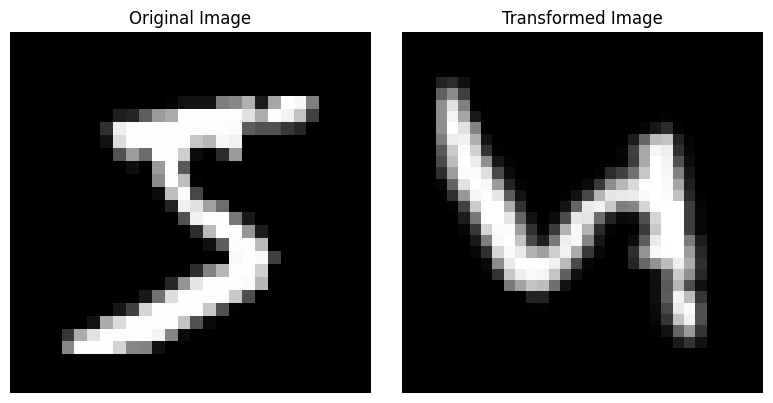

In [9]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# Load the MNIST dataset without any transformations
dataset = MNIST(root='data/', train=True, download=True)

# Select an image from the dataset
image, _ = dataset[0]

# Define the transformations to apply to the input image
transform = transforms.Compose([
    transforms.Resize((32, 32)),           # Resize the image to (32, 32)
    transforms.RandomHorizontalFlip(),     # Randomly flip the image horizontally
    transforms.RandomRotation(99),  
    transforms.ToTensor(),                  # Convert the image to a tensor
    transforms.Normalize((0.5,), (0.5,))    # Normalize the image with mean and standard deviation
])

# Apply the transformations to the image
transformed_image = transform(image)

# Display a comparison of the original and transformed images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(transformed_image.squeeze().numpy(), cmap='gray')
axs[1].set_title("Transformed Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()


##### as we can see the image has been rotated by a certain degree

#### Now let's jump right into the project:

In this project, we will train our CNN model on MNIST dataset that can predict handwritten digits from 0 to 9.

In [11]:
#import the libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [12]:
# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1)
        self.fc1 = nn.Linear(in_features = 64 * 14 * 14 , out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

#define training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
# Define test funcion
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Driver class

batch_size = 32 
use_cuda = 'cuda' if torch.cuda.is_available() else 'cpu'
num_epoch = 5

if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': batch_size}



if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset1 = datasets.MNIST('../data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1,batch_size=batch_size, 
                      shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, 
                      shuffle=False)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(1, num_epoch + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

    if num_epoch % 5 == 0:
        torch.save(model.state_dict(), "mnist_cnn.pt")


100.0%


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



100.0%

Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw




9.9%

100.0%


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw



100.0%


Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327553
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.261898
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.251096
Train Epoch: 1 [4800/60000 (8%)]	Loss: 2.163360
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.107783
Train Epoch: 1 [8000/60000 (13%)]	Loss: 2.077239
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.013971
Train Epoch: 1 [11200/60000 (19%)]	Loss: 1.831029
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.813885
Train Epoch: 1 [14400/60000 (24%)]	Loss: 1.493106
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.431598
Train Epoch: 1 [17600/60000 (29%)]	Loss: 1.234198
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.943657
Train Epoch: 1 [20800/60000 (35%)]	Loss: 1.038527
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.656278
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.762998
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.694490
Train Epoch: 1 [27200/60000 (45%)]	Loss: 0.668621
Train Epoch: 1 [28800/60000 (48%)]	Lo

In [13]:
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [14]:
# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


In [15]:
#check labels

print(labels)

tensor([2, 0, 4, 1, 5, 9, 9, 8, 6, 8, 2, 6, 0, 2, 3, 1, 2, 2, 4, 4, 9, 9, 8, 5,
        8, 1, 6, 7, 4, 1, 6, 1])


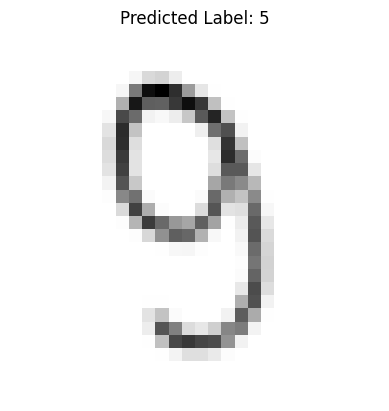

In [24]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# Test the model on a single input
model.eval()
# Load and preprocess the image
image_path = 'test_num.PNG'  # Replace with the path to your grayscale image
image = Image.open(image_path)
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize to 28x28
    transforms.Grayscale(num_output_channels=1),  # Ensure it's grayscale
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize the image
])
image = transform(image).to(device)
image = image.unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(image)

# Interpret the model's output (e.g., classification or regression)
# Replace this part with your specific task (e.g., softmax for classification)
predicted_class = torch.argmax(output, dim=1).item()

# Define a function to display the image and label
def show_image_with_label(image, label):
    image = image.squeeze(0).squeeze(0)  # Remove the batch dimension
    plt.imshow(image.cpu().numpy(), cmap='gray')
    plt.title(f"Predicted Label: {label}")
    plt.axis('off')
    plt.show()

# Display the image with the predicted label
show_image_with_label(image, predicted_class)


## Calculating Total Number of Parameters in a CNN Architecture

To calculate the total number of parameters in a Convolutional Neural Network (CNN) architecture in PyTorch, you can iterate through all the trainable parameters of the network and count the number of elements in each parameter. The total number of parameters will be the sum of all these counts.

Here's the code to calculate the total number of parameters in a given CNN architecture:



In [25]:
import torch
import torch.nn as nn

# Define your CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the CNN
net = SimpleCNN()

# Calculate the total number of parameters layer by layer
for name, param in net.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}, Parameters: {param.numel()}")

print("Total Number of Parameters:", sum(p.numel() for p in net.parameters() if p.requires_grad))

Layer: conv1.weight, Parameters: 432
Layer: conv1.bias, Parameters: 16
Layer: conv2.weight, Parameters: 4608
Layer: conv2.bias, Parameters: 32
Layer: fc1.weight, Parameters: 262144
Layer: fc1.bias, Parameters: 128
Layer: fc2.weight, Parameters: 1280
Layer: fc2.bias, Parameters: 10
Total Number of Parameters: 268650


#### we use net.named_parameters() to get an iterator over all the parameters in the network along with their corresponding names. We then iterate through these parameters and print the name of the layer along with the number of parameters in that layer. Finally, we print the total number of trainable parameters in the entire network.

#### When you run this code, it will display the parameter counts for each layer and the total number of parameters in the CNN architecture.